In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\SJC\datasets\dump.csv",encoding="ISO-8859-1")

In [4]:
df

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01-09-2022,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29-09-2022,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20-09-2022,7aae3e886e89fc1

In [5]:
df.drop(['Unnamed: 0'], axis=1)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01-09-2022,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29-09-2022,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b8

In [6]:
df.shape

(46608, 16)

In [7]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [8]:
del df["Unnamed: 0"]

In [9]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [10]:
df.sample(5)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
12155,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,0-0,0,NaN,1dd68ebd0fede169fd30d8e5b3439a4c2bb0f82bcdb55d...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,dfc547927d5d24adeba89e786ac0ef05ca3e54ba2ef947...,929260ad9b9ea9fe0f3553dd964f4ff3deb5792efd031a...,9edff2628ff7385bffbe7fc9cae89010d2cb9182e805e1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,e0670e9434b1a14548023c497585ea38f659b107929308...
29072,1ea65ea38f2f574b3875ba895e4ff76b284b7725041612...,LOST,Low availability,0-0,0,NaN,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,63b903353f68881cb1476510051a5eb4de5e81e4e2daea...
40858,6b61e611d25ec81e83491a7e289ed7483d067c4c9bb50e...,LOST,Low budget,0-0,0,NaN,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,f618d9049cbfb9410ad8d47541218cc7a2a9e930750f59...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3c77f261a156a5308fee53720276395ef78d2e7367e422...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,616c5e2cd72df50f88ed09fc963b8805918a482d364866...
14469,95d245f3eb25eb695e980c0591c16a4c818e609cd2aac2...,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ea58dc05b968545d016953b84130933e920097afbf3443...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,085c3a49a31cbfa71c36746a98dc908d30d423a63b969c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,891dc909cb09bebe0d9a99adcdfefce0a465b450888afd...
13657,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,No supply,130,short-stay,NaN,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,966f00f82051ba668712a33e25d9a030e83926bdfc328f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,d6a969fff41c54131a4743aeef27fc6d96da8b6ee94075...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,189a8181d5724d7cdefdf8a35d724a1b93c19a0ddce932...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB


In [12]:
missing_report = df.isnull().sum().reset_index().assign(
    misisng_percentage=lambda x: x[0]/df.shape[0] *100
).sort_values(by="misisng_percentage", ascending=False).rename(columns={
"index": "column name", 0: "missing row count", "misisng_percentage" : "missing percentage"
})
missing_report = missing_report[missing_report['missing percentage']>0]
missing_report

,column name,missing row count,missing percentage
13,room_type,23547,50.521370
5,movein,13638,29.261071
3,budget,3700,7.938551
2,lost_reason,3364,7.217645
4,lease,2341,5.022743


In [13]:
values = df['Agent_id'].value_counts()

In [14]:
values

2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    8186
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489    1456
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450    1280
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5    1105
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b    1070
                                                                    ... 
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d       1
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28       1
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963       1
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a       1
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a       1
Name: Agent_id, Length: 120, dtype: int64

In [15]:
len(values)

120

In [16]:
count = (df['Agent_id'] == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0').sum()

print(count)

0


Therefore there are no null values in Agent_id

In [17]:
duplicate_rows = df[df.duplicated(subset=['Agent_id'], keep=False)]

In [18]:
duplicate_rows

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01-09-2022,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29-09-2022,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b8

In [19]:
# Find occurrences of the 9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0 in all columns
count = 0
for col in df.columns:
    count += (df[col].str.contains('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0')).sum()

print(count)

31791


There are 31791 null values across all columns.

In [20]:
# Find occurrences of the 9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0 in each column
for col in df.columns:
    count = (df[col].str.contains('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0')).sum()
    print(f"{col}: {count}")

Agent_id: 0
status: 0
lost_reason: 0
budget: 0
lease: 0
movein: 0
source: 5977
source_city: 8851
source_country: 8641
utm_source: 61
utm_medium: 3187
des_city: 2537
des_country: 2537
room_type: 0
lead_id: 0


It can be observed that Null values can be found in columns such as source_city, source_country, utm_source, utm_medium, des_city, des_country.

In [21]:
# Replace 9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0 with NaN in all columns
df = df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

In [22]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [23]:
df['status'].value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [24]:
# Define values to drop
values_to_drop = ['OPPORTUNITY', 'CONTACTED', 'PROCESSING','IMPORTANT']

# Drop rows containing certain values in a column
df = df.drop(df[df['status'].isin(values_to_drop)].index)

In [25]:
df.shape

(46317, 15)

In [26]:
df['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

<AxesSubplot:title={'center':'Status'}>

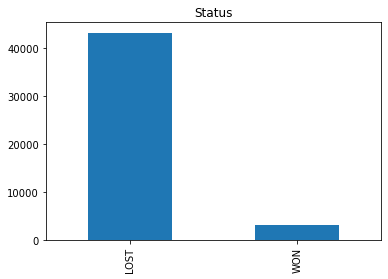

In [27]:
df['status'].value_counts().sort_index().plot(kind="bar", title="Status")

In [28]:
df['lost_reason'].value_counts()

Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead issue                         127
Looking for admission               41
Didn't respond in time              35
Visa/admission denied               17
Guarantor issue          

Also 6.63% of the data in 'lost_reason' is null. We would use mode method to fill the null values.

In [29]:
# Impute missing values in the 'column_name' column with mode
df['lost_reason'] = df['lost_reason'].fillna(df['lost_reason'].mode()[0])

In [30]:
df['lost_reason'].isna().sum()

0

No more null values in 'lost_reason'.

In [31]:
df['budget'].isna().sum()

3694

In [32]:
#drop columns
df = df.drop(columns=['room_type', 'movein'])

In [33]:
df['budget'].value_counts()

£60 - £120 Per week     9750
£121 - £180 Per Week    8878
0-0                     5719
£181 - £240 Per Week    2143
100                     1509
                        ... 
0-80-100$                  1
0-235                      1
£120-160 Per Week          1
1400 per month             1
0-500 PCM                  1
Name: budget, Length: 1851, dtype: int64

In [34]:
import re

In [35]:
def extract_budget(s):
    if isinstance(s, str):
        match = re.search(r'£(\d+) - £(\d+)', s)
        if match:
            return match.group(1) + '-' + match.group(2)
    return None

# Apply the function to the budget column
df['budget'] = df['budget'].apply(extract_budget)

In [36]:
df['budget'].value_counts()

60-120     9751
121-180    8878
181-240    2143
241-300     709
60-150        2
120-150       2
121-130       2
100-150       1
100-100       1
121-300       1
121-250       1
121-160       1
200-230       1
60-140        1
99-120        1
181-250       1
90-140        1
100-130       1
130-160       1
175-196       1
150-160       1
100-115       1
180-190       1
80-90         1
100-140       1
121-150       1
125-150       1
90-120        1
60-130        1
200-250       1
121-140       1
121-190       1
160-170       1
150-200       1
Name: budget, dtype: int64

In [37]:
df['budget'] = df['budget'].str.strip()

In [38]:
df['budget'] = df['budget'].fillna(0)

In [39]:
df['budget']

0              0
1              0
2        121-180
3              0
4              0
          ...   
46603     60-120
46604     60-120
46605    241-300
46606          0
46607    181-240
Name: budget, Length: 46317, dtype: object

In [40]:
def standardize_budget(value):
    value = str(value)  # Convert input to string
    # Check if value is already in standardized format
    if re.match('\d+-\d+', value):
        return value
    # If value is not in standardized format, parse the range and return standardized format
    pattern = r'\£?(\d+)\s*-\s*\£?(\d+)'
    match = re.match(pattern, value)
    if match:
        lower = int(match.group(1))
        upper = int(match.group(2))
        if lower <= 60 and upper <= 60:
            return '0-60'
        elif lower <= 120 and upper <= 120:
            return '61-120'
        elif lower <= 180 and upper <= 180:
            return '121-180'
        elif lower <= 240 and upper <= 240:
            return '181-240'
        elif lower <= 300 and upper <= 300:
            return '241-300'
        elif lower <= 360 and upper <= 360:
            return '301-360'
    # If value doesn't match any of the above conditions, return the original value
    return value

In [41]:
df['budget'] = df['budget'].apply(standardize_budget)

In [42]:
# Create a dictionary to map unstandardized values to their standardized values
budget_map = {
    '0': '0-60',
    '160-170': '121-180',
    '175-196': '181-240',
    '60-140': '61-120',
    '130-160': '121-180',
    '100-100': '0-60',
    '121-300': '301-360',
    '121-130': '121-180',
    '121-250': '241-300',
    '99-120': '61-120'
}

# Apply the dictionary to the budget column
df['budget'] = df['budget'].map(budget_map).fillna(df['budget'])

In [43]:
print(df['budget'].value_counts())

0-60       24804
60-120      9751
121-180     8882
181-240     2144
241-300      710
60-150         2
120-150        2
61-120         2
150-160        1
100-130        1
90-140         1
181-250        1
121-160        1
200-230        1
100-150        1
301-360        1
80-90          1
100-115        1
180-190        1
100-140        1
121-150        1
125-150        1
90-120         1
60-130         1
200-250        1
121-140        1
121-190        1
150-200        1
Name: budget, dtype: int64


In [44]:
budget_mapping = {
    '60-150': '61-120',
    '120-150': '121-180',
    '125-150': '121-180',
    '150-160': '121-180',
    '90-140': '0-60',
    '181-250': '181-240',
    '121-160': '121-180',
    '200-230': '181-240',
    '100-150': '0-60',
    '80-90': '0-60',
    '100-115': '0-60',
    '180-190': '181-240',
    '100-140': '0-60',
    '121-150': '121-180',
    '60-130': '0-60',
    '200-250': '181-240',
    '121-140': '121-180',
    '121-190': '121-180',
    '150-200': '121-180'
}

df['budget'] = df['budget'].replace(budget_mapping)

In [45]:
budget_mapping = {
    '60-120':'61-120',
    '90-120':'61-120',
    '100-130':'121-180'
}
df['budget'] = df['budget'].replace(budget_mapping)

In [46]:
print(df['budget'].value_counts())

0-60       24810
61-120      9756
121-180     8892
181-240     2148
241-300      710
301-360        1
Name: budget, dtype: int64


In [47]:
df['budget'].isna().sum()

0

<AxesSubplot:title={'center':'Budget'}>

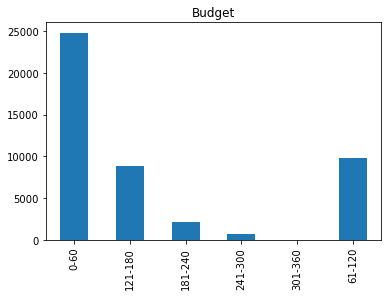

In [48]:
df['budget'].value_counts().sort_index().plot(kind="bar", title="Budget")

In [49]:
# check for new missing data report

missing_report_2 = df.isnull().sum().reset_index().assign(
    misisng_percentage=lambda x: x[0]/df.shape[0] *100
).sort_values(by="misisng_percentage", ascending=False).rename(columns={
"index": "column name", 0: "missing row count", "misisng_percentage" : "missing percentage"
})
missing_report_2 = missing_report_2[missing_report_2['missing percentage']>0]
missing_report_2

,column name,missing row count,missing percentage
6,source_city,8831,19.066433
7,source_country,8622,18.615195
5,source,5951,12.848414
9,utm_medium,3184,6.874366
10,des_city,2529,5.460198
11,des_country,2529,5.460198
4,lease,2336,5.043505
8,utm_source,61,0.131701


In [50]:
df['lease'].value_counts()

Full Year Course Stay 40 - 44 weeks           11000
0                                              7538
Complete Education Year Stay 50 - 52 weeks     6451
51                                             3952
Semester Stay 20 - 24 weeks                    2753
                                              ...  
44/weeks                                          1
36-40 weeks                                       1
12 month                                          1
44 weeks/51 weeks                                 1
78                                                1
Name: lease, Length: 310, dtype: int64

In [51]:
df['lease'].isna().sum()

2336

In [52]:
from sklearn.impute import SimpleImputer

# create the imputer object with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# fit the imputer on the lease column
imputer.fit(df[['lease']])

# transform the lease column
df['lease'] = imputer.transform(df[['lease']])

In [53]:
df['lease'].isna().sum()

0

In [54]:
df['source'].value_counts()

7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    19092
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916     3794
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b     3586
146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549     2210
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     2129
                                                                    ...  
ab4556b4118e9689282ac334ed94636124b8d4a531e2db6c2623eb0437de1ab2        1
ff25c08fc834360514f4fbc6434c2bb381ad04ea984ea86c2a0f5fb6ec94a831        1
fde7c38145e98695f302f2eb113737bcf9e6b3b0ec4ab2723f4d6610cc97813f        1
f4dd29fa0ded5c9ca30c96015bf8147165bfce38964c3842352d7a013b870ac9        1
93bee3e177d17c128e6a6af7b88fd675d7ec729b1a88ae13c582248dfd702378        1
Name: source, Length: 682, dtype: int64

In [55]:
df['source'].isna().sum()

5951

In [56]:
df.isnull().sum()

Agent_id             0
status               0
lost_reason          0
budget               0
lease                0
source            5951
source_city       8831
source_country    8622
utm_source          61
utm_medium        3184
des_city          2529
des_country       2529
lead_id              0
dtype: int64

In [ ]:
df['room_type'].value_counts().sum()

In [ ]:
df['room_type'].value_counts().sort_index().plot(kind="bar", title="Room Type")

Ensuite has most preference.

50% of data is missing in 'room_type'

In [ ]:
room_type_counts = df['room_type'].value_counts(normalize=True) * 100
print(room_type_counts)

In [78]:
# Define the values to sample from and their corresponding probabilities
values = ['Ensuite', 'Studio', 'Entire Place', 'Non-Ensuite', 'Twin-Studio']
probabilities = [0.54104332, 0.27678765, 0.18203894, 0.00008673, 0.00004336]

# Replace null values in the room_type column with a randomly sampled value
df['room_type'].fillna(pd.Series(np.random.choice(values, p=probabilities, size=len(df))), inplace=True)

In [79]:
df['room_type'].isna().sum()

0

In [80]:
df.isna().sum()

Unnamed: 0           0
Agent_id             0
status               0
lost_reason          0
budget            3700
lease                0
movein               0
source               0
source_city          0
source_country       0
utm_source           0
utm_medium           0
des_city             0
des_country          0
room_type            0
lead_id              0
dtype: int64

Therefore all the columns has no null values except budget column because I considered budget to be 0 for null values.

#### More data cleaning

Since our data is categorical we need to convert them now to numerical for building our model.

In [83]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
32019,32019,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,150,lease,01-01-1970,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d3...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,09bc8f0bb77bdddeb98527a39e995c2c605166399c178c...,4f00c4593da1a548582b1ebe1b922788912eeae5418345...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,0f077e25a0cc6f4c01c7427eb914842c28aabeec005a4f...
37860,37860,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,120,lease,01-01-1970,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d3...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,09bc8f0bb77bdddeb98527a39e995c2c605166399c178c...,4d89fc5548951b8aa7d1ee4e0af8d563c530ec89ed82b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,b244d01a52c16161c4bacf68cc3f9cb041a8c02d7e588e...
15994,15994,4596fcf257c4cd0393947526079ade602ea5a8a5774bf4...,LOST,Not interested,80,lease,01-01-1970,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d3...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,09bc8f0bb77bdddeb98527a39e995c2c605166399c178c...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,f7037544e34910d3085f34ee7eb3e8de487e380bfcebd0...
42666,42666,5a39335b3529acae692acc9954d3b3d71f69e84963c9fb...,LOST,Low budget,110,lease,01-01-1970,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d3...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,09bc8f0bb77bdddeb98527a39e995c2c605166399c178c...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,e3adf32bdd4e10c4b9fdc11f6eb6a250af106cda7e6c42...
43557,43557,7697b388861aaddea5d7d183f314dafe63696673b3417c...,LOST,Low availability,150,lease,01-01-1970,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d3...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,09bc8f0bb77bdddeb98527a39e995c2c605166399c178c...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,a7efd4ca85890489d083c0229d85fbb06c761b71c48daa...


In [84]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46608 entries, 32019 to 46600
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     46608 non-null  object
 3   budget          42908 non-null  object
 4   lease           46608 non-null  object
 5   movein          46608 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       46608 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


In [61]:
df1 = df.copy()

In [62]:
objList = df1.select_dtypes(include = "object").columns
print (objList)

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'lead_id'],
      dtype='object')


THERE ARE 13 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [63]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df1[feat] = le.fit_transform(df1[feat].astype(str))

print (df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 0 to 46607
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Agent_id        46317 non-null  int32
 1   status          46317 non-null  int32
 2   lost_reason     46317 non-null  int32
 3   budget          46317 non-null  int32
 4   lease           46317 non-null  int32
 5   source          46317 non-null  int32
 6   source_city     46317 non-null  int32
 7   source_country  46317 non-null  int32
 8   utm_source      46317 non-null  int32
 9   utm_medium      46317 non-null  int32
 10  des_city        46317 non-null  int32
 11  des_country     46317 non-null  int32
 12  lead_id         46317 non-null  int32
dtypes: int32(13)
memory usage: 2.7 MB
None


In [64]:
df1

,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,12,0,21,0,265,682,4315,184,5,10,205,8,24421
1,20,0,16,0,265,682,4315,184,5,10,74,8,22037
2,87,0,21,1,265,343,2619,165,25,3,18,8,17924
3,110,0,16,0,2,507,2817,165,25,3,26,8,3582
4,12,0,8,0,265,682,4315,184,5,10,219,14,30016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,15,0,15,5,260,682,2125,100,25,3,22,8,3295
46604,24,0,24,5,285,682,2695,100,25,3,135,8,3895
46605,5,0,15,3,265,343,2125,100,25,3,205,8,25937
46606,60,0,15,0,91,578,3943,133,19,49,205,8,3895


##### Using LabelEncoder method I converted the categorical data into numerical data.

LabelEncoder assigns a unique integer to each category in the data. For example, if you have a categorical feature called "color" with values "red", "green", and "blue", LabelEncoder would convert these values to 0, 1, and 2, respectively.

The fit method of the LabelEncoder class is used to learn the mapping between the categories and the integers, and the transform method is used to apply this mapping to new data. 

In [65]:
df1.describe()

,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
count,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000,46317.000000
mean,52.383531,0.066347,17.768983,1.383984,210.965434,412.872185,2672.680679,143.703802,22.236177,11.952566,120.641579,8.199948,15244.424358
std,35.958317,0.248891,5.763430,1.966303,102.385558,156.189815,1354.293783,46.114085,6.598797,18.134167,69.536681,1.749436,8809.690693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,15.000000,0.000000,195.000000,343.000000,1559.000000,100.000000,22.000000,3.000000,70.000000,8.000000,7619.000000
50%,43.000000,0.000000,18.000000,0.000000,265.000000,343.000000,2718.000000,165.000000,25.000000,3.000000,117.000000,8.000000,15224.000000
75%,83.000000,0.000000,21.000000,2.000000,265.000000,507.000000,3995.000000,170.000000,25.000000,10.000000,198.000000,8.000000,22884.000000
max,119.000000,1.000000,29.000000,5.000000,309.000000,682.000000,4315.000000,184.000000,34.000000,63.000000,219.000000,14.000000,30490.000000


In [66]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df1.columns
    vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

calc_vif(df1)

,variables,VIF
0,Agent_id,3.157274
1,status,1.091123
2,lost_reason,9.700593
3,budget,1.938910
4,lease,-4.086270
5,source,0.340477
6,source_city,-0.011483
7,source_country,11.240840
8,utm_source,10.502649
9,utm_medium,1.653109


In [67]:
#dropping 'des_country' due to high VIF value
df1.drop('des_country', axis=1, inplace=True)

In [68]:
#drop Agent_id, lead_id as these features does not provide any useful information for modeling.
df1 = df1.drop(['Agent_id', 'lead_id'], axis=1)

<AxesSubplot:>

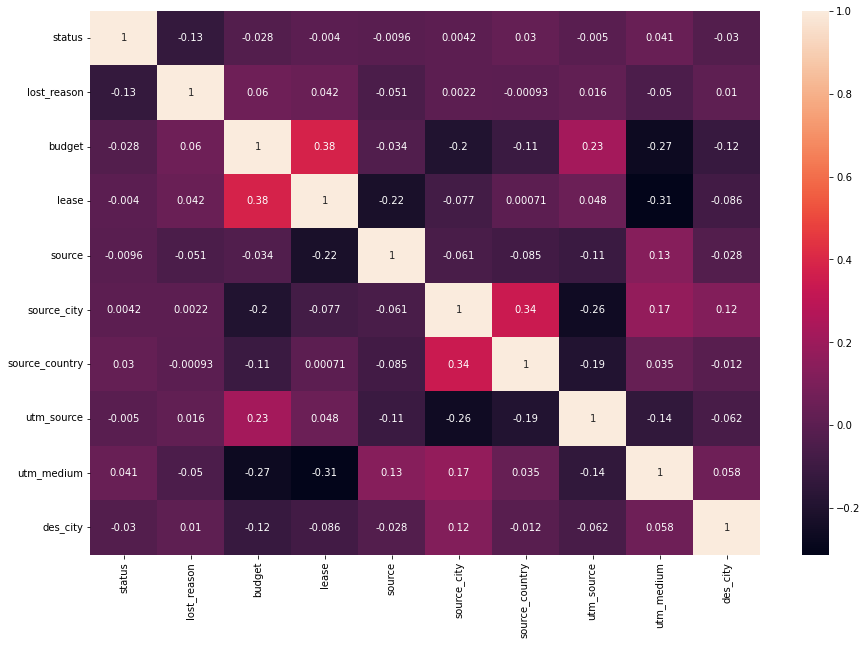

In [69]:
corr= df1.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

### Model Building

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [71]:
df1

,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city
0,0,21,0,265,682,4315,184,5,10,205
1,0,16,0,265,682,4315,184,5,10,74
2,0,21,1,265,343,2619,165,25,3,18
3,0,16,0,2,507,2817,165,25,3,26
4,0,8,0,265,682,4315,184,5,10,219
...,...,...,...,...,...,...,...,...,...,...
46603,0,15,5,260,682,2125,100,25,3,22
46604,0,24,5,285,682,2695,100,25,3,135
46605,0,15,3,265,343,2125,100,25,3,205
46606,0,15,0,91,578,3943,133,19,49,205


In [72]:
df1.columns

Index(['status', 'lost_reason', 'budget', 'lease', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city'],
      dtype='object')

In [75]:
x = df1.drop('status',axis=1)
x.shape

(46317, 9)

In [76]:
y = df1['status']
y.shape

(46317,)

In [77]:
xrf_train,xrf_test,yrf_train,yrf_test = train_test_split(x, y,test_size=0.2)

### Random Forest

In [78]:
model_xrf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_xrf.fit(xrf_train,yrf_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [79]:
yrf_predict = model_xrf.predict(xrf_test)
model_score_r = model_xrf.score(xrf_test, yrf_test)

In [80]:
model_score_r

0.9417098445595855

In [81]:
print(metrics.classification_report(yrf_test, yrf_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8678
           1       0.98      0.08      0.15       586

    accuracy                           0.94      9264
   macro avg       0.96      0.54      0.56      9264
weighted avg       0.94      0.94      0.92      9264



In [82]:
print(metrics.confusion_matrix(yrf_test, yrf_predict))

[[8677    1]
 [ 539   47]]


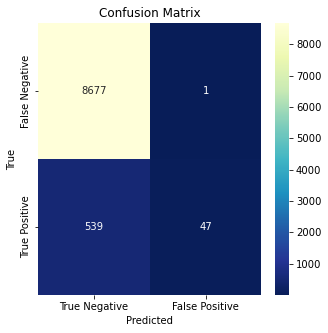

In [83]:
conf_mat = confusion_matrix(yrf_test, yrf_predict)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [85]:
# Predict the probability of positive class
y_score = model_xrf.predict_proba(xrf_test)[:, 1]

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve

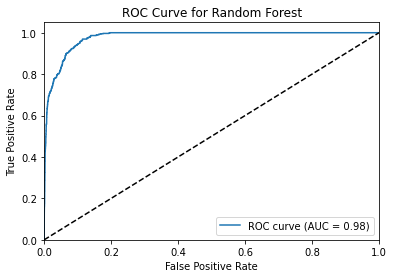

In [88]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(yrf_test, y_score)
roc_auc = roc_auc_score(yrf_test, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [89]:
clf = DecisionTreeClassifier(criterion="entropy")

In [91]:
clf.fit(xrf_train, yrf_train)

DecisionTreeClassifier(criterion='entropy')

In [92]:
accuracy = clf.score(xrf_test, yrf_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.41%


In [93]:
y_predict = clf.predict(xrf_test)
model_score = clf.score(xrf_test, yrf_test)

In [94]:
model_score

0.9740932642487047

In [95]:
print(metrics.classification_report(yrf_test, yrf_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8678
           1       0.98      0.08      0.15       586

    accuracy                           0.94      9264
   macro avg       0.96      0.54      0.56      9264
weighted avg       0.94      0.94      0.92      9264



In [97]:
print(metrics.confusion_matrix(yrf_test, yrf_predict))

[[8677    1]
 [ 539   47]]


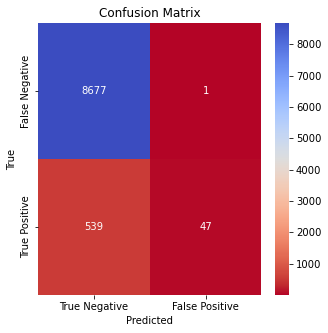

In [98]:
conf_mat = confusion_matrix(yrf_test, yrf_predict)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [99]:
# Predict the probability of positive class
y_score_r1 = clf.predict_proba(xrf_test)[:, 1]

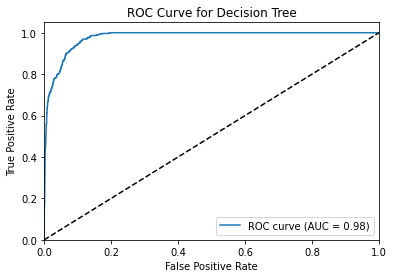

In [100]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(yrf_test, y_score)
roc_auc = roc_auc_score(yrf_test, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

Decision tree model predicts with a better accuracy than Random forest.

Decision tree predicts with an accuracy of 97%